In [115]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from pckgs.helper import timeseries_to_supervised2
from pckgs.models import get_model_price, train_model, get_model_both_sent
from pckgs.price_preprocess import PricePreprocess
from sklearn.model_selection import train_test_split
from pckgs.evaluator import Evaluator
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [106]:
coins = {}
coin_names = ['BTC_USD', 'ETH_USD', 'XRP_USD', 'LTC_USD', 'BCH_USD', 'XLM_USD', 'LINK_USD']
coin_dirs = []
for i in range(len(coin_names)): coin_dirs.append('./datasets/coinbase_hour_candles/' + coin_names[i] + '.feather')
coins = {coin_names[i]:coin_dirs[i] for i in range(len(coin_names))}
coins

{'BTC_USD': './datasets/coinbase_hour_candles/BTC_USD.feather',
 'ETH_USD': './datasets/coinbase_hour_candles/ETH_USD.feather',
 'XRP_USD': './datasets/coinbase_hour_candles/XRP_USD.feather',
 'LTC_USD': './datasets/coinbase_hour_candles/LTC_USD.feather',
 'BCH_USD': './datasets/coinbase_hour_candles/BCH_USD.feather',
 'XLM_USD': './datasets/coinbase_hour_candles/XLM_USD.feather',
 'LINK_USD': './datasets/coinbase_hour_candles/LINK_USD.feather'}

In [107]:
candle = pd.read_feather(coins['ETH_USD'])
candle.set_index('time', inplace=True)
candle

,open,high,low,close,volume
time,,,,,
2016-05-18 01:00:00+00:00,12.0,14.0,12.0,12.0,84.039862
2016-05-18 02:00:00+00:00,14.0,14.0,14.0,14.0,216.474765
2016-05-18 03:00:00+00:00,14.0,14.0,14.0,14.0,0.728000
2016-05-18 04:00:00+00:00,14.0,14.0,14.0,14.0,0.000000
2016-05-18 05:00:00+00:00,14.0,14.0,14.0,14.0,0.000000
...,...,...,...,...,...
2019-12-30 20:00:00+00:00,130.0,130.0,130.0,130.0,312175.121831
2019-12-30 21:00:00+00:00,130.0,130.0,130.0,130.0,544089.756907
2019-12-30 22:00:00+00:00,130.0,130.0,130.0,130.0,177055.847157


In [108]:
lag = 21
threshold = 0.0025
pp = PricePreprocess(lag, threshold)
positions = pp.preprocess(candle)
positions


 Value of observations: 

same    17950
up       6967
down     6790
Name: pChange, dtype: int64


,pChange_scaled_t-1,pChange_scaled_t-2,pChange_scaled_t-3,pChange_scaled_t-4,pChange_scaled_t-5,pChange_scaled_t-6,pChange_scaled_t-7,pChange_scaled_t-8,pChange_scaled_t-9,pChange_scaled_t-10,...,pChange_scaled_t-14,pChange_scaled_t-15,pChange_scaled_t-16,pChange_scaled_t-17,pChange_scaled_t-18,pChange_scaled_t-19,pChange_scaled_t-20,down,same,up
time,,,,,,,,,,,,,,,,,,,,,
2016-05-18 22:00:00+00:00,-0.2,-0.2,-0.2,-0.542857,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,...,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,0.200000,0,1,0
2016-05-18 23:00:00+00:00,-0.2,-0.2,-0.2,-0.200000,-0.542857,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,...,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,0,1,0
2016-05-19 00:00:00+00:00,-0.2,-0.2,-0.2,-0.200000,-0.200000,-0.542857,-0.200000,-0.200000,-0.200000,-0.200000,...,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,0,1,0
2016-05-19 01:00:00+00:00,-0.2,-0.2,-0.2,-0.200000,-0.200000,-0.200000,-0.542857,-0.200000,-0.200000,-0.200000,...,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,0,1,0
2016-05-19 02:00:00+00:00,-0.2,-0.2,-0.2,-0.200000,-0.200000,-0.200000,-0.200000,-0.542857,-0.200000,-0.200000,...,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-30 20:00:00+00:00,-0.2,-0.2,-0.2,-0.200000,-0.200000,-0.236364,-0.200000,-0.200000,-0.200000,-0.235821,...,-0.200000,-0.163636,-0.235821,-0.200000,-0.163636,-0.235821,-0.200000,0,1,0
2019-12-30 21:00:00+00:00,-0.2,-0.2,-0.2,-0.200000,-0.200000,-0.200000,-0.236364,-0.200000,-0.200000,-0.200000,...,-0.200000,-0.200000,-0.163636,-0.235821,-0.200000,-0.163636,-0.235821,0,1,0
2019-12-30 22:00:00+00:00,-0.2,-0.2,-0.2,-0.200000,-0.200000,-0.200000,-0.200000,-0.236364,-0.200000,-0.200000,...,-0.200000,-0.200000,-0.200000,-0.163636,-0.235821,-0.200000,-0.163636,0,1,0


In [109]:
y = positions.loc[:, ['down', 'same', 'up']]
x = positions.drop(['down', 'same', 'up'], axis=1)

In [110]:
#if we want sentiment!!!!!!!!!!!!!!
sentiment = pd.read_csv('../Text/datasets/headline_sentiment_mean.csv', index_col='date', parse_dates=['date'])

sentiment_score = timeseries_to_supervised2(sentiment, lag=21)
sentiment_score.dropna(inplace=True)
sentiment_score.drop('sentiment_score_t', axis=1, inplace=True)
x2 = sentiment_score

x = x2.merge(x, left_index=True, right_on=pd.to_datetime(x.index.strftime('%Y-%m-%d')), how='right').dropna()

x.drop(columns='key_0', inplace=True)
x = x.values.reshape((len(x), int(len(x.columns) / 2), 2), order='F')

In [111]:
print(x.shape)
print(y.shape)

(31707, 20, 2)
(31707, 3)


In [112]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

test_index = y_test.index
train_index = y_train.index

In [113]:
#create labeled y_test to measure pnl, confusion matrix
y_test_labeled = y_test.rename(columns={'down': -1, 'same': 0, 'up': 1})
y_test_labeled = y_test_labeled.idxmax(axis=1)

y_train_labeled = y_train.rename(columns={'down': -1, 'same': 0, 'up': 1})
y_train_labeled = y_train_labeled.idxmax(axis=1)

In [114]:
test_candle = candle.reindex(test_index)
train_candle = candle.reindex(train_index)

In [116]:
# model = get_model_price()
model = get_model_both_sent()

In [117]:
# model, history = train_model(model, (x_train, x_test, y_train, y_test), '../models/model_price.h5', epochs=3)
model, history = train_model(model, (x_train, x_test, y_train, y_test), '../models/model_both_sent.h5', epochs=3)

<AxesSubplot:>

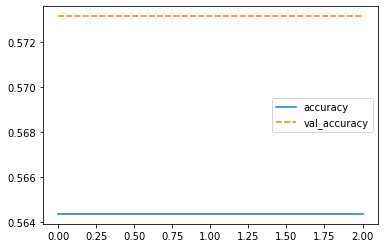

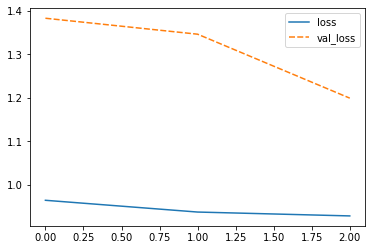

In [118]:
ac = {'accuracy': history.history['accuracy'], 'val_accuracy': history.history['val_accuracy']}
plt.figure()
sb.lineplot(data=ac)

loss = {'loss': history.history['loss'], 'val_loss': history.history['val_loss']}
plt.figure()
sb.lineplot(data=loss)

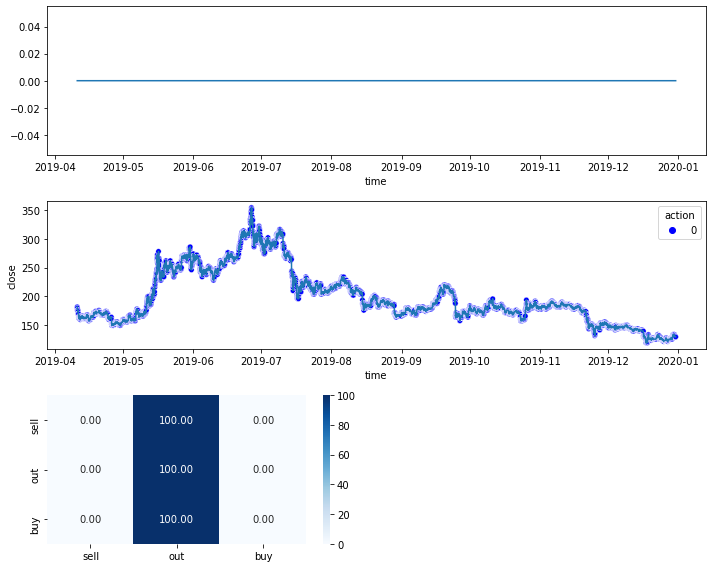

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      1374
           0       0.57      1.00      0.73      3635
           1       0.00      0.00      0.00      1333

    accuracy                           0.57      6342
   macro avg       0.19      0.33      0.24      6342
weighted avg       0.33      0.57      0.42      6342



/home/solon/anaconda3/envs/Ptyxiaki/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [119]:
#create labeled y_pred for pnl, confusion matrix
y_pred = model.predict(x_test)
y_pred_labeled = pd.DataFrame(y_pred, columns=[-1, 0, 1], index=test_index)
y_pred_labeled = y_pred_labeled.idxmax(axis=1)

Evaluator.evaluate(y_pred_labeled, y_test_labeled, test_candle)
print(classification_report(y_test_labeled, y_pred_labeled))

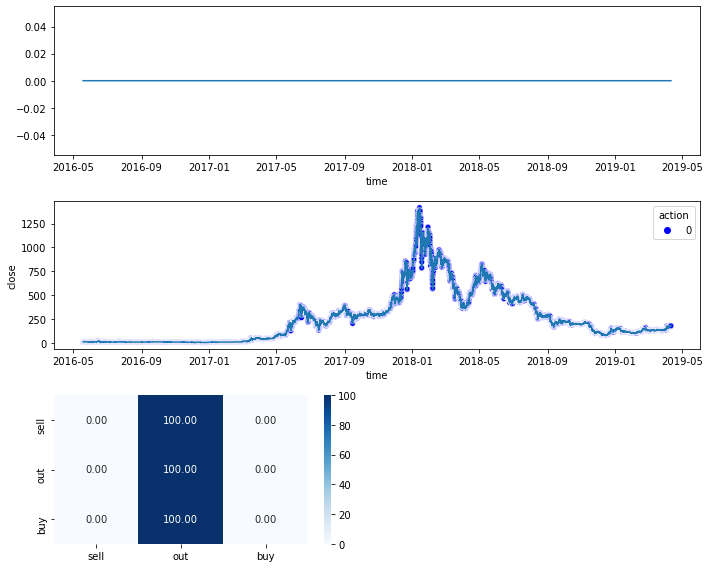

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      5416
           0       0.56      1.00      0.72     14315
           1       0.00      0.00      0.00      5634

    accuracy                           0.56     25365
   macro avg       0.19      0.33      0.24     25365
weighted avg       0.32      0.56      0.41     25365



/home/solon/anaconda3/envs/Ptyxiaki/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [120]:
y_predt = model.predict(x_train)
y_predt_labeled = pd.DataFrame(y_predt, columns=[-1, 0, 1], index=train_index)
y_predt_labeled = y_predt_labeled.idxmax(axis=1)

Evaluator.evaluate(y_predt_labeled, y_train_labeled, train_candle)
print(classification_report(y_train_labeled, y_predt_labeled))